1. Cleaned text:
 artificial intelligence is transforming our world machine learning a subset of ai enables computers to learn from data deep learning models can recognize patterns in images and speech ai assistants like siri and alexa are becoming smarter every day researchers predict ai will revolutionize healthcare and education by 2030

2. Tokenization comparison:
NLTK word_tokenize(): ['artificial', 'intelligence', 'is', 'transforming', 'our', 'world', 'machine', 'learning', 'a', 'subset', 'of', 'ai', 'enables', 'computers', 'to', 'learn', 'from', 'data', 'deep', 'learning', 'models', 'can', 'recognize', 'patterns', 'in', 'images', 'and', 'speech', 'ai', 'assistants', 'like', 'siri', 'and', 'alexa', 'are', 'becoming', 'smarter', 'every', 'day', 'researchers', 'predict', 'ai', 'will', 'revolutionize', 'healthcare', 'and', 'education', 'by', '2030']
Python split()      : ['artificial', 'intelligence', 'is', 'transforming', 'our', 'world', 'machine', 'learning', 'a', 'subset', 'of', 

<Axes: title={'center': 'Top 10 Words Frequency'}, xlabel='Samples', ylabel='Counts'>

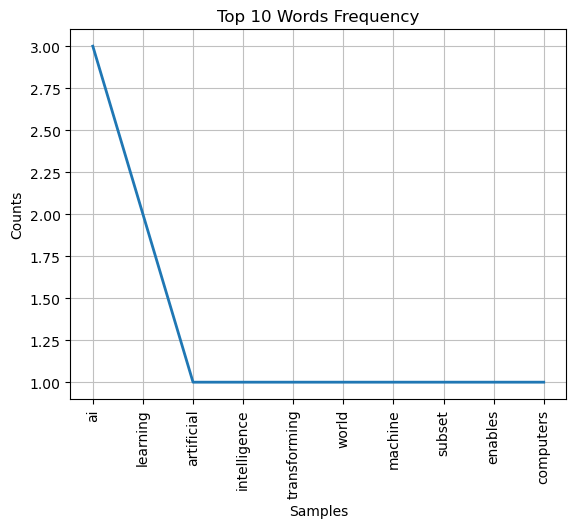

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import Counter

# Original paragraph about AI
paragraph = """Artificial Intelligence is transforming our world! Machine learning, a subset of AI, enables computers to learn from data. Deep learning models can recognize patterns in images and speech. AI assistants like Siri and Alexa are becoming smarter every day. Researchers predict AI will revolutionize healthcare and education by 2030."""

# 1. Convert to lowercase and remove punctuation using regex
clean_text = re.sub(r'[^\w\s]', '', paragraph.lower())
print("1. Cleaned text:\n", clean_text)

# 2. Tokenization
words_nltk = word_tokenize(clean_text)  # NLTK's tokenizer
words_split = clean_text.split()       # Python's split()

print("\n2. Tokenization comparison:")
print("NLTK word_tokenize():", words_nltk)
print("Python split()      :", words_split)

# 3. Sentence tokenization
sentences = sent_tokenize(paragraph)
print("\n3. Sentence tokens:", sentences)

# 4. Stopword removal
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words_nltk if word not in stop_words]
print("\n4. After stopword removal:", filtered_words)

# 5. Word frequency distribution
fdist = FreqDist(filtered_words)
print("\n5. Word frequency distribution:")
print(fdist.most_common())

# Bonus: Visualization
fdist.plot(10, title="Top 10 Words Frequency")

In [4]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('omw-1.4')

# Original paragraph from Q1
paragraph = """Artificial Intelligence is transforming our world! Machine learning, a subset of AI, enables computers to learn from data. Deep learning models can recognize patterns in images and speech. AI assistants like Siri and Alexa are becoming smarter every day. Researchers predict AI will revolutionize healthcare and education by 2030."""

# 1. Extract alphabetic words using regex
words = re.findall(r'\b[a-zA-Z]+\b', paragraph.lower())
print("1. Alphabetic words:\n", words)

# 2. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]
print("\n2. After stopword removal:\n", filtered_words)

# 3. Porter Stemming
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in filtered_words]
print("\n3. Porter Stemming results:\n", stemmed)

# 4. WordNet Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(word) for word in filtered_words]
print("\n4. Lemmatization results:\n", lemmatized)

# 5. Comparison
print("\n5. Comparison (first 10 words):")
print(f"{'Original':<15} {'Stemmed':<15} {'Lemmatized':<15}")
print("-" * 45)
for orig, stem, lemma in zip(filtered_words[:10], stemmed[:10], lemmatized[:10]):
    print(f"{orig:<15} {stem:<15} {lemma:<15}")

# When to use each technique
print("\nWhen to use:")
print("- Stemming: For fast, approximate reduction (e.g., search engines, information retrieval)")
print("- Lemmatization: When precise word forms matter (e.g., chatbots, text analysis)")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Yash\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


1. Alphabetic words:
 ['artificial', 'intelligence', 'is', 'transforming', 'our', 'world', 'machine', 'learning', 'a', 'subset', 'of', 'ai', 'enables', 'computers', 'to', 'learn', 'from', 'data', 'deep', 'learning', 'models', 'can', 'recognize', 'patterns', 'in', 'images', 'and', 'speech', 'ai', 'assistants', 'like', 'siri', 'and', 'alexa', 'are', 'becoming', 'smarter', 'every', 'day', 'researchers', 'predict', 'ai', 'will', 'revolutionize', 'healthcare', 'and', 'education', 'by']

2. After stopword removal:
 ['artificial', 'intelligence', 'transforming', 'world', 'machine', 'learning', 'subset', 'ai', 'enables', 'computers', 'learn', 'data', 'deep', 'learning', 'models', 'recognize', 'patterns', 'images', 'speech', 'ai', 'assistants', 'like', 'siri', 'alexa', 'becoming', 'smarter', 'every', 'day', 'researchers', 'predict', 'ai', 'revolutionize', 'healthcare', 'education']

3. Porter Stemming results:
 ['artifici', 'intellig', 'transform', 'world', 'machin', 'learn', 'subset', 'ai', 'e

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Sample product reviews
reviews = [
    "The camera quality is excellent but battery life is poor",
    "Amazing display and super fast processor worth every penny",
    "Average sound quality though very comfortable to wear all day"
]

# 1. Bag-of-Words with CountVectorizer
count_vec = CountVectorizer(stop_words='english')
bow_matrix = count_vec.fit_transform(reviews)
print("1. Bag-of-Words Representation:")
print(pd.DataFrame(bow_matrix.toarray(), 
                  columns=count_vec.get_feature_names_out()))  # Added missing parenthesis

# 2. TF-IDF with TfidfVectorizer
tfidf_vec = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vec.fit_transform(reviews)
print("\n2. TF-IDF Matrix:")
print(pd.DataFrame(tfidf_matrix.toarray().round(2), 
                  columns=tfidf_vec.get_feature_names_out()))  # Added missing parenthesis

# 3. Top 3 keywords per review
feature_names = tfidf_vec.get_feature_names_out()
for i, review in enumerate(reviews):
    tfidf_scores = dict(zip(feature_names, tfidf_matrix[i].toarray()[0]))
    top_keywords = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:3]
    print(f"\nReview {i+1}: '{review}'")
    print("Top 3 Keywords:", [word for word,score in top_keywords])

1. Bag-of-Words Representation:
   amazing  average  battery  camera  comfortable  day  display  excellent  \
0        0        0        1       1            0    0        0          1   
1        1        0        0       0            0    0        1          0   
2        0        1        0       0            1    1        0          0   

   fast  life  penny  poor  processor  quality  sound  super  wear  worth  
0     0     1      0     1          0        1      0      0     0      0  
1     1     0      1     0          1        0      0      1     0      1  
2     0     0      0     0          0        1      1      0     1      0  

2. TF-IDF Matrix:
   amazing  average  battery  camera  comfortable   day  display  excellent  \
0     0.00     0.00     0.42    0.42         0.00  0.00     0.00       0.42   
1     0.38     0.00     0.00    0.00         0.00  0.00     0.38       0.00   
2     0.00     0.42     0.00    0.00         0.42  0.42     0.00       0.00   

   fast  life  

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

# Sample texts about two technologies
ai_text = """Artificial Intelligence mimics human cognition using machine learning. 
It powers chatbots, recommendation systems, and computer vision. 
AI models improve through training on large datasets. 
The technology raises ethical concerns about bias and job displacement."""

blockchain_text = """Blockchain is a decentralized digital ledger technology. 
It enables secure cryptocurrency transactions without intermediaries. 
Each block contains cryptographic hashes linking to the previous block. 
Blockchain offers transparency but faces scalability challenges."""

# 1. Preprocessing and Tokenization
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

ai_tokens = set(preprocess(ai_text))
blockchain_tokens = set(preprocess(blockchain_text))

print("AI Tokens:", ai_tokens)
print("\nBlockchain Tokens:", blockchain_tokens)

# 2a. Jaccard Similarity
intersection = len(ai_tokens & blockchain_tokens)
union = len(ai_tokens | blockchain_tokens)
jaccard = intersection / union
print(f"\nJaccard Similarity: {jaccard:.2f}")

# 2b. Cosine Similarity
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([ai_text, blockchain_text])
cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
print(f"Cosine Similarity: {cosine_sim:.2f}")

# 3. Analysis
print("\nSimilarity Analysis:")
print("- Jaccard measures lexical overlap (shared words/total unique words)")
print("- Cosine measures directional similarity (considers word importance via TF-IDF)")
print("\nIn this case:")
print(f"Jaccard ({jaccard:.2f}) shows they share few exact words")
print(f"Cosine ({cosine_sim:.2f}) reveals some conceptual similarity through weighted terms")

AI Tokens: {'systems', 'datasets', 'ethical', 'job', 'bias', 'cognition', 'intelligence', 'large', 'models', 'human', 'improve', 'raises', 'machine', 'powers', 'computer', 'technology', 'recommendation', 'ai', 'using', 'displacement', 'vision', 'concerns', 'chatbots', 'learning', 'artificial', 'training', 'mimics'}

Blockchain Tokens: {'digital', 'ledger', 'secure', 'contains', 'faces', 'intermediaries', 'block', 'decentralized', 'transactions', 'blockchain', 'cryptocurrency', 'scalability', 'technology', 'hashes', 'transparency', 'challenges', 'without', 'linking', 'previous', 'cryptographic', 'offers', 'enables'}

Jaccard Similarity: 0.02
Cosine Similarity: 0.05

Similarity Analysis:
- Jaccard measures lexical overlap (shared words/total unique words)
- Cosine measures directional similarity (considers word importance via TF-IDF)

In this case:
Jaccard (0.02) shows they share few exact words
Cosine (0.05) reveals some conceptual similarity through weighted terms


In [24]:
!pip install textblob vaderSentiment wordcloud matplotlib pandas

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 7.7 MB/s eta 0:00:00


Sentiment Analysis Results:
                                              Review Sentiment  Compound_Score
0  This smartphone has an amazing camera and supe...  Positive            0.88
1  Battery life is disappointing and the screen s...  Negative           -0.44
2  The device works fine for basic tasks, but not...  Positive            0.10
3  Best purchase I've made this year! The display...  Positive            0.80
4  Customer service was horrible - they refused t...  Negative           -0.36


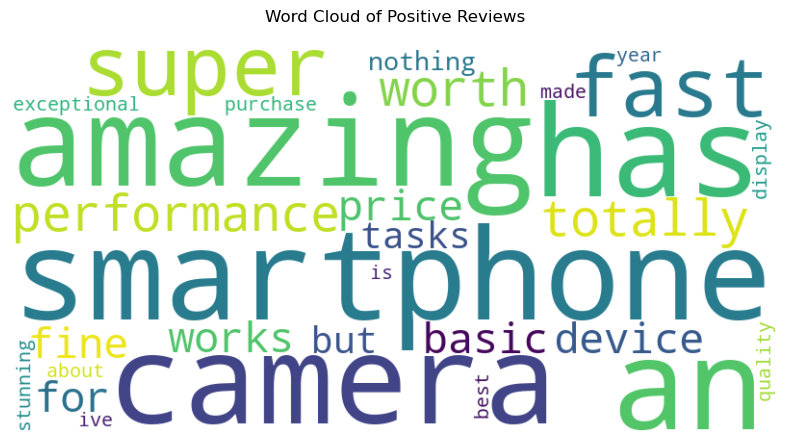

In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import re

# Sample product reviews
reviews = [
    "This smartphone has an amazing camera and super fast performance. Totally worth the price!",
    "Battery life is disappointing and the screen scratches too easily. Would not recommend.",
    "The device works fine for basic tasks, but nothing exceptional about it.",
    "Best purchase I've made this year! The display quality is stunning.",
    "Customer service was horrible - they refused to honor the warranty."
]

# Initialize VADER (works better than TextBlob for short texts)
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment for each review
results = []
for review in reviews:
    scores = analyzer.polarity_scores(review)
    sentiment = "Positive" if scores['compound'] > 0.05 else \
                "Negative" if scores['compound'] < -0.05 else "Neutral"
    results.append({
        'Review': review,
        'Sentiment': sentiment,
        'Compound_Score': round(scores['compound'], 2)
    })

# Create DataFrame
df = pd.DataFrame(results)
print("Sentiment Analysis Results:")
print(df[['Review', 'Sentiment', 'Compound_Score']])

# Generate word cloud for positive reviews
positive_reviews = " ".join([
    review for review, sentiment in zip(reviews, df['Sentiment']) 
    if sentiment == "Positive"
])

# Clean text for word cloud
positive_reviews_clean = re.sub(r'[^\w\s]', '', positive_reviews.lower())

# Create and plot word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    stopwords={'this', 'and', 'the', 'it'}  # Add more stopwords as needed
).generate(positive_reviews_clean)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Positive Reviews", pad=20)
plt.show()

In [30]:
!pip install tensorflow numpy

In [32]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

# 1. Training Data Preparation
training_data = """Artificial intelligence is transforming modern technology. 
Machine learning algorithms can now recognize patterns in complex datasets. 
Deep learning models power advanced applications like computer vision. 
Natural language processing enables machines to understand human language. 
AI systems are becoming increasingly sophisticated each year."""

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([training_data])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in training_data.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and label
X = input_sequences[:,:-1]
y = to_categorical(input_sequences[:,-1], num_classes=total_words)

# 2. Model Building
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_sequence_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. Training (reduced epochs for demonstration)
model.fit(X, y, epochs=50, verbose=1)

# Text Generation Function
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Generate new text
print("Generated Text 1:", generate_text("AI", 5, model, max_sequence_len))
print("Generated Text 2:", generate_text("Deep", 4, model, max_sequence_len))
print("Generated Text 3:", generate_text("Machine", 3, model, max_sequence_len))

Epoch 1/50


C:\Users\Yash\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.0569 - loss: 3.7129
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0853 - loss: 3.7057
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1318 - loss: 3.7002
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1137 - loss: 3.6941
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0749 - loss: 3.6884
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0929 - loss: 3.6813
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1137 - loss: 3.6724
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0853 - loss: 3.6631
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0853 - loss: 3.6517
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0853 - loss: 3.6393
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0749 - loss: 3.6233
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0853 - loss: 3.6019
Epoch 13/50
